## Importing Libraries ##

In [945]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Importing DATA file ##

In [948]:
df = pd.read_csv("DATA/heart_disease_uci.csv")

#Showing file data sample to make sure file uploaded right 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## DATA Preprocessing & Cleaning ## 

* checking missing values

In [952]:
df.isna()  


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [954]:
# handling missing values
df=df.dropna()


In [956]:
#cheching the missing values again to ensure it droped
df.isna()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
508,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


* Encoding Categorical Data

In [959]:
#encoding using one-hot encoding to all categorical columns at once, including binary columns 
categorical_columns=['sex','dataset','cp','fbs','restecg','exang','slope','thal']


In [961]:
# Use dummies to encode all categorical columns, drop_first=True for binary columns to avoid redundancy
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
#checking the encoded columns
df.head(100)

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,150.0,2.3,0.0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2,1,0,...,0,0,0,0,0,1,1,0,1,0
2,3,67,120.0,229.0,129.0,2.6,2.0,1,1,0,...,0,0,0,0,0,1,1,0,0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,59,110.0,239.0,142.0,1.2,1.0,2,1,0,...,0,0,0,0,0,1,1,0,0,1
97,98,60,150.0,258.0,157.0,2.6,2.0,3,0,0,...,0,0,0,0,0,0,1,0,0,1
98,99,52,134.0,201.0,158.0,0.8,1.0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
99,100,48,122.0,222.0,186.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [963]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        299 non-null    int64  
 1   age                       299 non-null    int64  
 2   trestbps                  299 non-null    float64
 3   chol                      299 non-null    float64
 4   thalch                    299 non-null    float64
 5   oldpeak                   299 non-null    float64
 6   ca                        299 non-null    float64
 7   num                       299 non-null    int64  
 8   sex_Male                  299 non-null    int32  
 9   dataset_Hungary           299 non-null    int32  
 10  dataset_VA Long Beach     299 non-null    int32  
 11  cp_atypical angina        299 non-null    int32  
 12  cp_non-anginal            299 non-null    int32  
 13  cp_typical angina         299 non-null    int32  
 14  fbs_True       

* Scaling Numerical Features

In [966]:
scaler = StandardScaler()
df[['id','age', 'trestbps', 'chol','thalch','oldpeak','ca','num']] = scaler.fit_transform(df[['id','age', 'trestbps', 'chol','thalch','oldpeak','ca','num']])

# and droping id coulmn as it is not important in the analysis
df = df.drop('id', axis=1)
df.head(100)

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,dataset_VA Long Beach,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,0.940446,0.749760,-0.262867,0.029124,1.069475,-0.718306,-0.770537,1,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1.384143,1.596354,0.747722,-1.790447,0.380309,2.487269,0.857665,1,0,0,...,0,0,0,0,0,1,1,0,1,0
2,1.384143,-0.661231,-0.339138,-0.880662,1.327912,1.418744,0.043564,1,0,0,...,0,0,0,0,0,1,1,0,0,1
3,-1.943588,-0.096835,0.061285,1.632079,2.103224,-0.718306,-0.770537,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,-1.499891,-0.096835,-0.815830,0.982232,0.294163,-0.718306,-0.770537,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.496748,-1.225627,-0.148460,-0.317461,0.121872,0.350219,0.857665,1,0,0,...,0,0,0,0,0,1,1,0,0,1
97,0.607673,1.031958,0.213826,0.332385,1.327912,1.418744,1.671765,0,0,0,...,0,0,0,0,0,0,1,0,0,1
98,-0.279722,0.128924,-0.873034,0.375708,-0.222711,0.350219,-0.770537,1,0,0,...,0,0,0,1,0,0,0,1,1,0
99,-0.723420,-0.548352,-0.472612,1.588756,-0.911877,-0.718306,-0.770537,1,0,0,...,0,0,0,0,0,0,0,1,1,0


# Data Visualization #

* Histogram

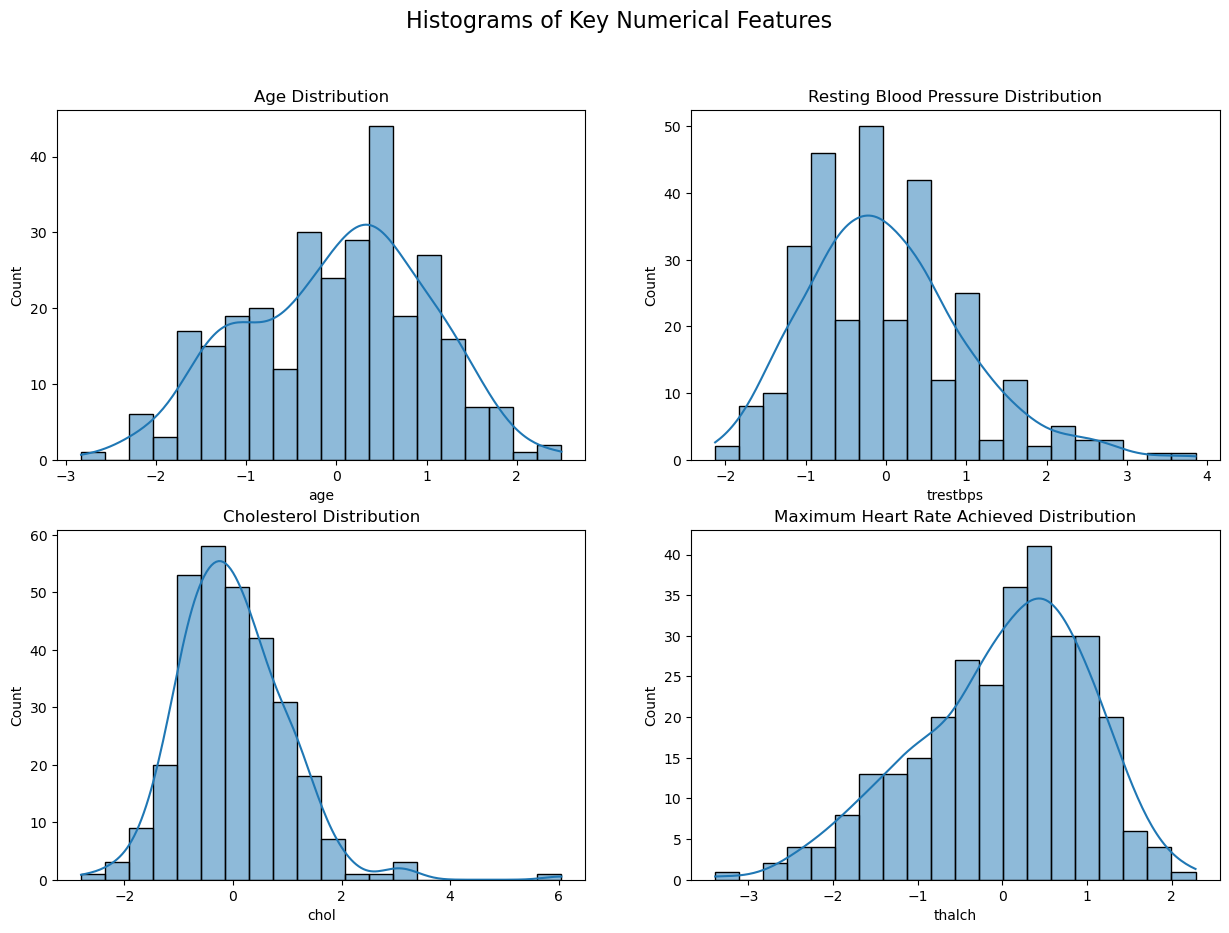

In [970]:
# i will make histogram for key numerical features like (age, resting blood pressure , cholestrol, max heart rate)
# with the target column which is num (count) 

plt.figure(figsize=(15, 10))
plt.suptitle('Histograms of Key Numerical Features', fontsize=16)

plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['trestbps'], kde=True, bins=20)
plt.title('Resting Blood Pressure Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['chol'], kde=True, bins=20)
plt.title('Cholesterol Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['thalch'], kde=True, bins=20)
plt.title('Maximum Heart Rate Achieved Distribution')


plt.show()

* correlation heatmap

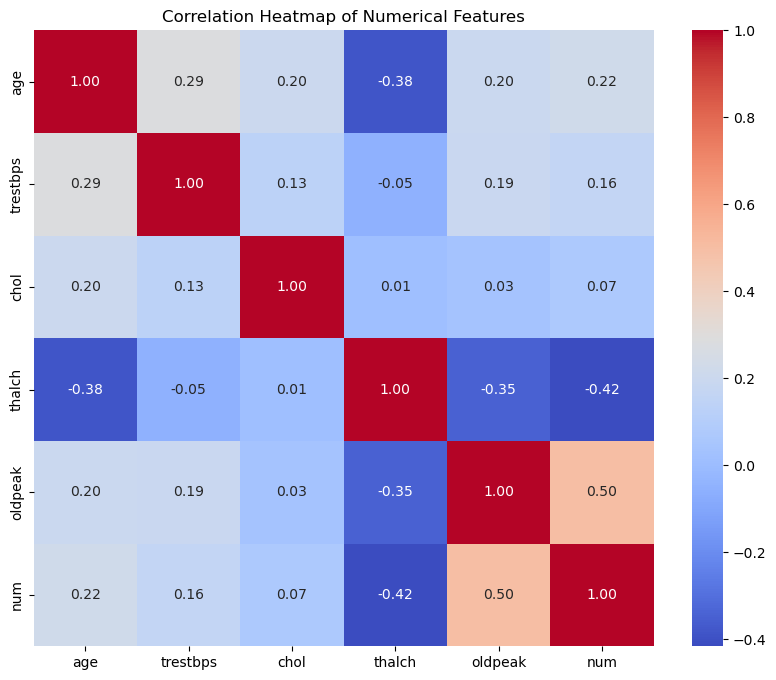

In [972]:
# Select numerical columns for the heatmap
numerical_df = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']]
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')

plt.show()

* Box Plot

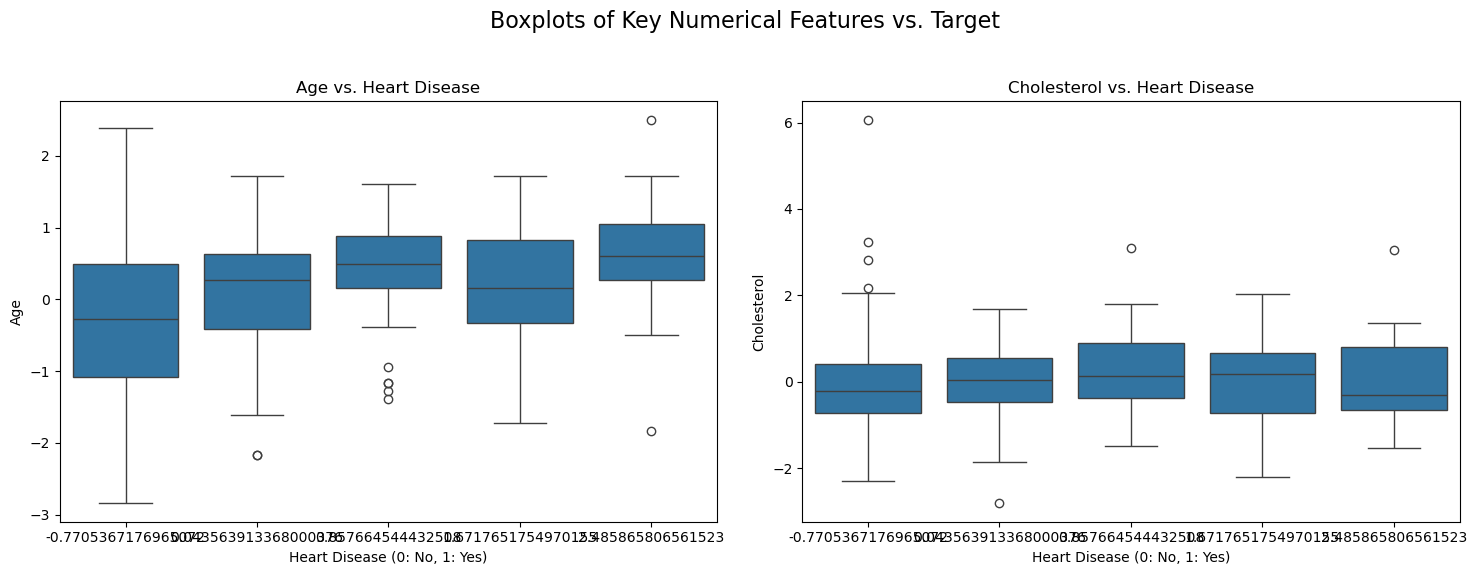

In [974]:
# i will do two samples of box plot for (age & heart disease cases) and (cholestrol & heart disease cases)
plt.figure(figsize=(15, 6))
plt.suptitle('Boxplots of Key Numerical Features vs. Target', fontsize=16)

plt.subplot(1, 2, 1)
sns.boxplot(x='num', y='age', data=df)
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='num', y='chol', data=df)
plt.title('Cholesterol vs. Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('boxplots.png')
plt.show()

In [975]:
# creating a new file for data cleaned instead of overwriting the original data file
df.to_csv('data cleaned.csv', index=False)